<a href="https://colab.research.google.com/github/AhmetA75/assiginment/blob/main/assignment_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade kneed # Elbow method visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB                            
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from time import time
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from numpy import unique, where
from kneed import KneeLocator
from sklearn.decomposition import PCA

In [3]:
import warnings as warn  # Filtering warings for clear output
warn.filterwarnings("ignore")

In [4]:
data = pd.read_excel("TEMP.xlsx") # İmporting Raw data

In [5]:
from sklearn.impute import KNNImputer # Handling missing and nan values

Before_imputation = data
print("Data Before performing imputation\n",Before_imputation)
imputer = KNNImputer(n_neighbors=2)
data_imputed = imputer.fit_transform(Before_imputation)
print("\n\nAfter performing imputation\n",data_imputed)
data_imputed=pd.DataFrame(data_imputed, columns= Before_imputation.columns)

Data Before performing imputation
       SEX  EDUC  MARISTAT  INDEPEND  RESIDENC  NACCFAM  ANYMEDS  SMOKYRS  \
0       2    18         1         1         1        1        1        0   
1       1    11         1         1         1        1        1        0   
2       2    16         1         1         1        1        1       10   
3       1    14         1         1         1        0        1        0   
4       1    16         1         1         2        0        1       50   
...   ...   ...       ...       ...       ...      ...      ...      ...   
1349    1    20         1         1         1        1        1        0   
1350    1    16         1         2         1        0        1        0   
1351    2    14         2         1         1        1        1        0   
1352    2    20         3         1         1        1        1       25   
1353    2    14         1         1         1        1        1       10   

      NACCTBI  DIABETES  ...   RSUPFR  RSUPFRM  RSUP

In [6]:
data_imputed

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2.0,18.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,27.9038,2.2157,10.3481,1.7014,13.4250,1.7419,9.8700,1.6792,0.8906,1.1947
1,1.0,11.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,29.0600,2.6900,9.2500,1.6300,14.8800,2.3000,7.2700,1.8900,1.3800,2.0300
2,2.0,16.0,1.0,1.0,1.0,1.0,1.0,10.0,0.0,1.0,...,33.0000,2.5400,13.6900,1.5600,16.2300,2.0700,10.1100,1.8400,1.0100,1.5000
3,1.0,14.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,31.6800,2.4100,9.6400,1.4500,15.1100,1.6400,10.3900,1.8300,0.7400,1.1000
4,1.0,16.0,1.0,1.0,2.0,0.0,1.0,50.0,0.0,0.0,...,28.0631,1.9501,9.1125,1.0427,13.3763,1.6270,7.5844,1.4595,0.6638,0.8527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1.0,20.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,24.6892,2.6528,10.5460,2.1712,14.1128,2.8833,9.3176,2.3582,0.6735,1.0270
1350,1.0,16.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,...,24.7908,2.0993,10.4094,1.4855,10.7880,1.9027,10.2034,2.0484,0.7267,0.7946
1351,2.0,14.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,23.8500,2.1200,12.3900,1.5300,12.6600,1.9900,9.4800,1.7400,1.1800,1.5900
1352,2.0,20.0,3.0,1.0,1.0,1.0,1.0,25.0,0.0,0.0,...,31.3500,2.4300,10.8200,1.7000,13.7700,2.1000,11.1200,2.1400,1.3100,1.5200


In [8]:
data_cat_2 = data.iloc[:, :27] # Seperating categorical columns from big dataset
data_cat_2

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,...,DEL,HALL,AGIT,DEPD,ANX,ELAT,APA,DISN,IRR,MOT
0,2,18,1,1,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,11,1,1,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,2,16,1,1,1,1,1,10,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,14,1,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,16,1,1,2,0,1,50,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1,20,1,1,1,1,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1350,1,16,1,2,1,0,1,0,0,0,...,0,0,1,0,1,0,1,1,0,0
1351,2,14,2,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1352,2,20,3,1,1,1,1,25,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.preprocessing import OneHotEncoder  # Encoding categorical data for better handling.
one_hot_encoded_data = pd.get_dummies(data_cat_2)
pd.DataFrame(one_hot_encoded_data)

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,...,DEL,HALL,AGIT,DEPD,ANX,ELAT,APA,DISN,IRR,MOT
0,2,18,1,1,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,11,1,1,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,2,16,1,1,1,1,1,10,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,14,1,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,16,1,1,2,0,1,50,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1,20,1,1,1,1,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1350,1,16,1,2,1,0,1,0,0,0,...,0,0,1,0,1,0,1,1,0,0
1351,2,14,2,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1352,2,20,3,1,1,1,1,25,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data_imputed.corrwith(data_imputed['CDRGLOB']).sort_values(ascending=False) # For ML procedures most correlated columns detected with our target.

CDRGLOB     1.000000
INDEPEND    0.693881
APA         0.448558
LATVENT     0.420204
LLATVENT    0.414033
              ...   
LHIPPO     -0.442185
HIPPOVOL   -0.449069
LENTM      -0.453646
RENTM      -0.478207
NACCMMSE   -0.746660
Length: 192, dtype: float64

In [11]:
y = data_imputed['CDRGLOB']
X = data_imputed.loc[:, ["NACCMMSE", "RENTM", "INDEPEND","APA"]]   # Most Correlated columns with CDRGLOB colmn (target).

In [12]:
data

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,18,1,1,1,1,1,0,0,0,...,27.9038,2.2157,10.3481,1.7014,13.4250,1.7419,9.8700,1.6792,0.8906,1.1947
1,1,11,1,1,1,1,1,0,0,0,...,29.0600,2.6900,9.2500,1.6300,14.8800,2.3000,7.2700,1.8900,1.3800,2.0300
2,2,16,1,1,1,1,1,10,0,1,...,33.0000,2.5400,13.6900,1.5600,16.2300,2.0700,10.1100,1.8400,1.0100,1.5000
3,1,14,1,1,1,0,1,0,0,1,...,31.6800,2.4100,9.6400,1.4500,15.1100,1.6400,10.3900,1.8300,0.7400,1.1000
4,1,16,1,1,2,0,1,50,0,0,...,28.0631,1.9501,9.1125,1.0427,13.3763,1.6270,7.5844,1.4595,0.6638,0.8527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1,20,1,1,1,1,1,0,0,0,...,24.6892,2.6528,10.5460,2.1712,14.1128,2.8833,9.3176,2.3582,0.6735,1.0270
1350,1,16,1,2,1,0,1,0,0,0,...,24.7908,2.0993,10.4094,1.4855,10.7880,1.9027,10.2034,2.0484,0.7267,0.7946
1351,2,14,2,1,1,1,1,0,0,0,...,23.8500,2.1200,12.3900,1.5300,12.6600,1.9900,9.4800,1.7400,1.1800,1.5900
1352,2,20,3,1,1,1,1,25,0,0,...,31.3500,2.4300,10.8200,1.7000,13.7700,2.1000,11.1200,2.1400,1.3100,1.5200


In [13]:
X

,NACCMMSE,RENTM,INDEPEND,APA
0,30.0,3.5253,1.0,0.0
1,19.0,2.3400,1.0,0.0
2,29.0,3.5100,1.0,0.0
3,30.0,3.2900,1.0,0.0
4,27.0,2.4244,1.0,0.0
...,...,...,...,...
1349,29.0,3.6591,1.0,1.0
1350,27.0,0.7054,2.0,1.0
1351,29.0,3.1700,1.0,0.0
1352,30.0,3.9700,1.0,0.0


In [14]:
y

0       0.0
1       2.0
2       0.0
3       0.0
4       1.0
       ... 
1349    1.0
1350    2.0
1351    0.0
1352    0.0
1353    0.0
Name: CDRGLOB, Length: 1354, dtype: float64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [16]:
gauss = GaussianNB()                         # Trying suitable algorithms.
decision_tree = DecisionTreeClassifier()  
random_forest = RandomForestClassifier()

In [17]:
gauss.fit(X=x_train, y=y_train)                # Algorithms fitted.
decision_tree.fit(X=x_train, y=y_train)
random_forest.fit(X=x_train, y=y_train)

RandomForestClassifier()

In [18]:
print(f'TEST ACC DT ==> {decision_tree.score(x_test, y_test)}')      # All algorithms scores listed, GNB Chosed.
print(f'TEST ACC RF ==> {random_forest.score(x_test, y_test)}')
print(f'TEST ACC GNB ==> {gauss.score(x_test, y_test)}')

TEST ACC DT ==> 0.6420664206642066
TEST ACC RF ==> 0.6494464944649446
TEST ACC GNB ==> 0.7011070110701108


In [19]:
# Parameter optimization for grid search (test purpose).
random_forest_param = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [20]:
gauss_param = {'var_smoothing': np.logspace(0,-9, num=100)}       # Parameter optimization for Grid Search.

In [21]:
grid_gauss_5 = GridSearchCV(GaussianNB(), gauss_param, cv=5) # best algoihm fitted grid.
start = time() # For working time and tested by cv=5
grid_gauss_5.fit(x_train, y_train)
print(f'TIME FOR CV=5 ==> {time() - start}')
print(f'BEST PARAMS FOR GRID Gauss CV = 5 ==> {grid_gauss_5.best_params_}')
print(f'TEST ACC GRID Gauss CV = 5 ==> {grid_gauss_5.score(x_test, y_test)}')

TIME FOR CV=5 ==> 4.787163019180298
BEST PARAMS FOR GRID Gauss CV = 5 ==> {'var_smoothing': 0.004328761281083057}
TEST ACC GRID Gauss CV = 5 ==> 0.7195571955719557


In [22]:
grid_random_forest_5 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = random_forest_param, 
                          cv = 5, n_jobs = -1, verbose = 2)
start = time() # For working time and tested by cv=5
grid_random_forest_5.fit(x_train, y_train)
print(f'TIME FOR CV=5 ==> {time() - start}')
print(f'BEST PARAMS FOR GRID RANDOM FOREST  CV = 5 ==> {grid_random_forest_5.best_params_}')
print(f'TEST ACC GRID RANGOM FOREST CV = 5 ==> {grid_random_forest_5.score(x_test, y_test)}')
     

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
TIME FOR CV=5 ==> 850.449282169342
BEST PARAMS FOR GRID RANDOM FOREST  CV = 5 ==> {'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 200}
TEST ACC GRID RANGOM FOREST CV = 5 ==> 0.7047970479704797


In [23]:
from sklearn.metrics import accuracy_score  # for testing our optimized model's efficency.

In [26]:
y_sample2 = grid_gauss_5.predict(x_test)
accuracy = (accuracy_score(y_test, y_sample2))
a=pd.DataFrame([accuracy])
b=a.max()

print('The Max Value:',b);

The Max Value: 0    0.719557
dtype: float64


In [27]:
from sklearn.metrics import classification_report , confusion_matrix

In [28]:
class_names = ['class 0', 'class 1', 'class 2' , 'class 3']

In [29]:
print(classification_report(y_sample2, y_test, target_names=class_names))

              precision    recall  f1-score   support

     class 0       0.93      0.76      0.84       158
     class 1       0.53      0.74      0.62        70
     class 2       0.55      0.55      0.55        33
     class 3       0.50      0.50      0.50        10

    accuracy                           0.72       271
   macro avg       0.63      0.64      0.62       271
weighted avg       0.76      0.72      0.73       271



In [30]:
print(confusion_matrix(y_sample2, y_test))

[[120  36   2   0]
 [  9  52   9   0]
 [  0  10  18   5]
 [  0   1   4   5]]


In [31]:
def visualize_results(model, x_test, y_test, x_label='NACCMMSE', ylabel='CDRGLOB'):    
    """
    prediction and visualize function
    :param model: fitted ML model
    :param x_test: x_test parameter
    :param y_test: y_test parameter
    :param x_label: colmn name in graphic
    :param ylabel: y colmn name
    :return:
    """
    plt.scatter(x_test[x_label], y_test)
    plt.title("Original Test Data")  # title
    plt.xlabel(x_label)  # x label
    plt.ylabel(ylabel)  # y label
    plt.show()

    y_pred = model.predict(x_test)
    plt.scatter(x_test[x_label], y_pred)
    plt.title("GaussianNB with Grid Search")  # title
    plt.xlabel(x_label)  # x label
    plt.ylabel(ylabel)  # y label
    plt.show()
     

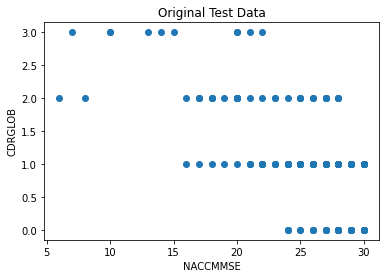

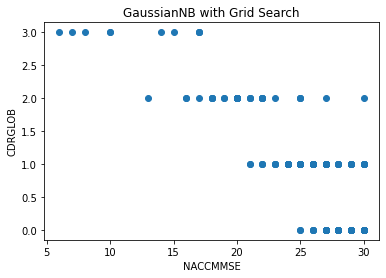

In [32]:
# visualization.
visualize_results(model=grid_gauss_5, x_test=x_test, y_test=y_test)


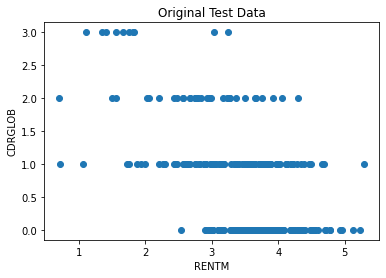

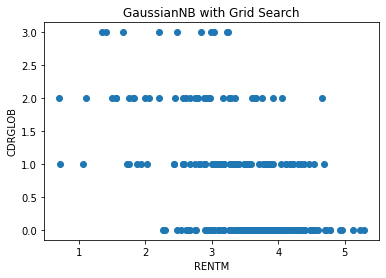

In [33]:
visualize_results(model=grid_gauss_5, x_test=x_test, y_test=y_test,x_label='RENTM')

In [34]:
def KMeansClustering(X):
    """
    This function finds the best cluster number and makes clusters leads to elbow method
    :param X: data
    :return:
    """
    md = []

    # np_counts = asarray(counts)
    # X = np_counts.reshape(-1, 1)

    # X = np.asarray(X)

    for i in range(1, 5):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        o = kmeans.inertia_
        md.append(o)

    plt.plot(range(1, 5), md)
    plt.title('The Elbow Method Graph')
    plt.xlabel('Number of clusters')
    plt.ylabel('MD')
    plt.show()

    kn = KneeLocator(
        range(1, 5),
        md,
        curve='convex',
        direction='decreasing',
        interp_method='polynomial',
    )

    # elbow method =
    n_cluster = kn.knee
    # print(n_cluster)

    model = KMeans(n_clusters=n_cluster)

    model.fit(X)
    # assign a cluster to each example.
    yhat = model.predict(X)
    # retrieve unique clusters.
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster.
    for cluster in clusters:
        # get row indexes for samples with this cluster.
        row_ix = where(yhat == cluster)
        # create scatter of these samples.
        plt.scatter(X[row_ix, 0], X[row_ix, 1])
    # show the plot.
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Clusters - K-Means')
    plt.show()
     

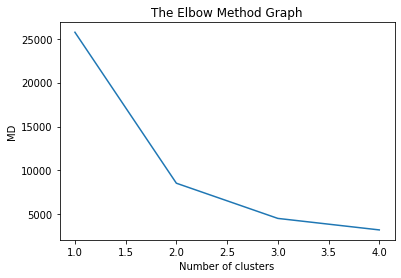

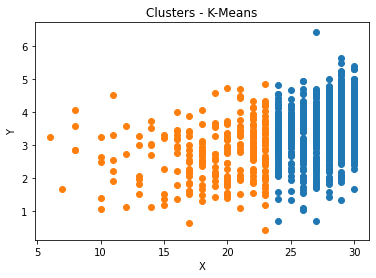

In [35]:
KMeansClustering(X.values)

In [36]:
def apply_PCA(X, y, visualize=True):                 # Dimensionally reduction.
    """
     This function appiles PCA
    :param X: data
    :param y: data labes
    :param visualize: if visualize is True, function visualizes pca results
    :return: pca result df
    """
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data=principalComponents, columns=['PCA_COLUMN_1', 'PCA_COLUMN_2'])

    # VISUALIZE PCA
    if visualize:
        plot = plt.scatter(principalDf['PCA_COLUMN_1'], principalDf['PCA_COLUMN_2'], c=y)
        plt.legend(handles=plot.legend_elements()[0], labels=list(unique(y.values)))
        plt.title("PCA")  # title
        plt.xlabel('PCA_COLUMN_1')  # x label
        plt.ylabel('PCA_COLUMN_2')  # y label
        plt.show()

    return principalDf

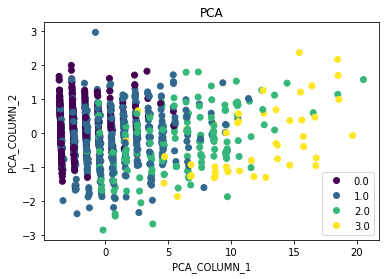

,PCA_COLUMN_1,PCA_COLUMN_2
0,-3.523619,-0.165544
1,7.484205,-0.233310
2,-2.530705,-0.080962
3,-3.503775,-0.396487
4,-0.455903,-0.947261
...,...,...
1349,-2.509019,0.014915
1350,-0.185041,-2.840542
1351,-2.502031,-0.414666
1352,-3.561123,0.270921


In [37]:
# PCA
apply_PCA(X=X, y=y)

In [38]:
! pip install shap  # As a final visualizations for our model.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 26.1 MB/s eta 0:00:00


In [39]:
import shap
#grid_gauss_5.fit(x_train, y_train)
shap_model_fitted=grid_gauss_5.fit(x_train, y_train)

In [40]:
# Fits the explainer
explainer = shap.Explainer(shap_model_fitted.predict, x_test)
# Calculates the SHAP values 
shap_values = explainer(x_test)

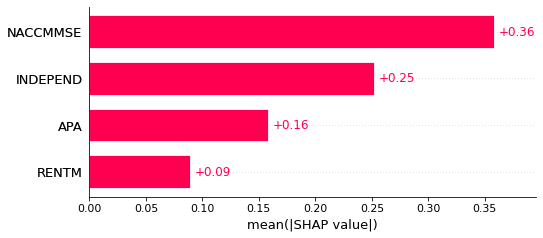

In [41]:
shap.plots.bar(shap_values)

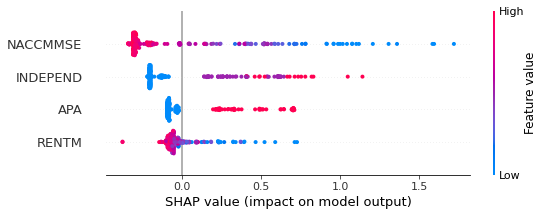

In [42]:
shap.summary_plot(shap_values)

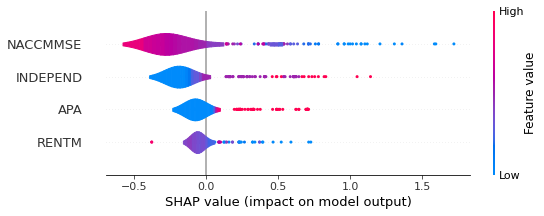

In [43]:
shap.summary_plot(shap_values, plot_type='violin')

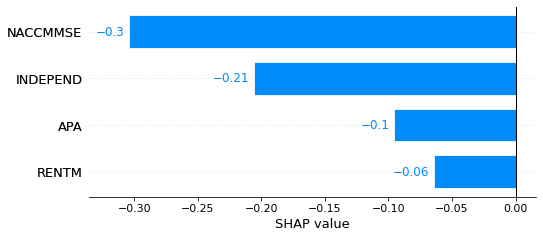

In [44]:
shap.plots.bar(shap_values[0])

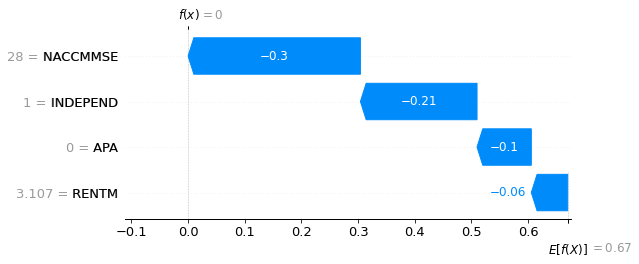

In [45]:
shap.plots.waterfall(shap_values[0])

In [46]:
shap.initjs() # For javascript permissions in notebook.
shap.plots.force(shap_values[0])